<center>

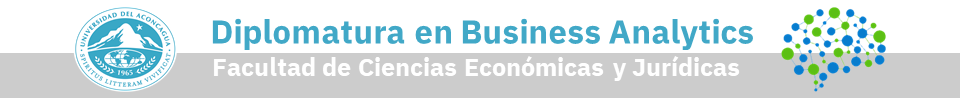

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 11

</font>
</center>

~~~
Apellido y Nombre: Liquitay Alexandra Romina
~~~

**Instrucciones del Trabajo Final**

El conjunto de datos contiene información sobre los clientes de un centro comercial. Se desea utilizar un modelo de Agrupación para crear clusters y tomar una decisión comercial con cada grupo de clientes que ayude a mejorar la relación con el cliente y el monto de dinero que gastan en el centro comercial.

- Desarrollar los puntos necesarios para generar el modelo de Agrupación.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión sobre decisiones a tomar con cada cluster.

# **Carga de módulos y datos necesarios**

In [ ]:
!pip install pandas==1.3.4
!pip install pandas-profiling==3.1.0
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [3]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/Mall_Customers.csv"
df = pd.read_csv(datos)
pd.__version__

'1.3.4'

- CustomerID - ID de cliente
- Gender - Genero
- Age - Edad
- AnualIncome - Ingreso Anual
- SpendingScore - Score de gasto en el mall

##Análisis Exploratorio de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape #tamaño del DataFrame

(200, 5)

In [6]:
df.drop(columns='CustomerID', inplace = True) #eliminar columnas que no son necesarias

In [7]:
df = df.rename(columns={#renombrar columnas
    'Gender':'genero',
    'Age':'edad',
    'AnnualIncome':'ingreso_anual',
    'SpendingScore':'importe_gastado',
    }) 

##Normalizamos dataset

In [8]:
df = pd.get_dummies(df, drop_first = True ) #convertir variable categoríca a numérica para normalizar

##División del Conjunto de Datos

In [9]:
clientes = df.sample(frac=0.85, random_state=0)
clientes_no_vistos = df.drop(clientes.index)

In [10]:
clientes.reset_index(inplace=True, drop=True)
clientes_no_vistos.reset_index(inplace=True, drop=True)

In [11]:
print("Datos para Modelar: " + str(clientes.shape))
print("Datos no vistos para Predicciones: " + str(clientes_no_vistos.shape))

Datos para Modelar: (170, 4)
Datos no vistos para Predicciones: (30, 4)


##Configurar entorno PyCaret

In [60]:
from pycaret.clustering import setup, create_model, plot_model, assign_model, evaluate_model, predict_model, save_model, load_model

In [41]:
agrupacion = setup(clientes, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(170, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(170, 4)"
9,CPU Jobs,-1


# **Generación del modelo de agrupación**

##Creación del modelo

##Algoritmo K-Means

In [42]:
km = create_model('kmeans', num_clusters=5)
print(km)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4336,125.9148,0.8352,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [15]:
cluster = 5

##Asignando modelo

In [43]:
km_resultados = assign_model(km)
km_resultados.head()

,edad,ingreso_anual,importe_gastado,genero_Male,Cluster
0,52,23,29,1,Cluster 1
1,40,87,13,1,Cluster 3
2,54,63,46,1,Cluster 2
3,48,61,42,1,Cluster 2
4,27,88,69,1,Cluster 0


In [44]:
km_resultados.shape

(170, 5)

##Visualización del modelo

In [45]:
plot_model(km)

In [47]:
evaluate_model(km) #para analizar el rendimiento del modelo entrenado

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

##Visualización del Codo

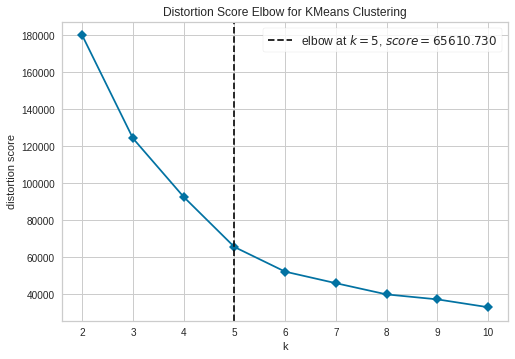

In [19]:
plot_model(km, plot = 'elbow') #n° óptimo de clusters

##Visualización de la Silueta

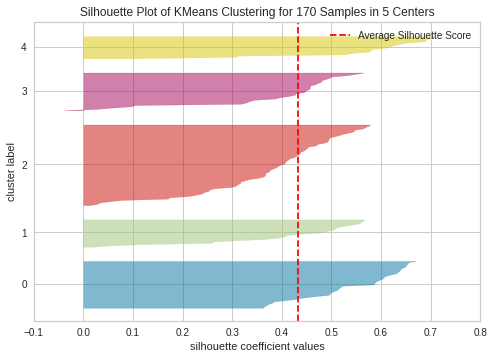

In [20]:
plot_model(km, plot = 'silhouette') #varía entre -1 y 1, evalua que tan buena es la asignación del dato al cluster, cuanto más cercano a 1 mejor

In [21]:
centroids = km.cluster_centers_
labels = km.labels_

In [78]:
centroids = pd.DataFrame(centroids, columns=['edad', 'ingreso_anual', 'importe_gastado','genero_Male'])
centroids

,edad,ingreso_anual,importe_gastado,genero_Male
0,32.459457,85.864853,82.081078,0.486486
1,45.363636,25.954536,21.090904,0.409091
2,43.809517,55.158726,49.396824,0.428571
3,40.166668,86.266663,19.166660,0.566667
4,25.555555,25.999992,78.777771,0.388889


In [22]:
import altair as alt

In [84]:
plot_1 = alt.Chart(centroids).mark_circle(size=100).encode(x='edad', y='ingreso_anual', color=alt.value('black')).interactive()

In [83]:
plot_2 = alt.Chart(km_resultados).mark_point().encode(y="ingreso_anual", x="edad", color='Cluster:N').interactive()

In [85]:
plot_1 + plot_2 #cluster y centroides

alt.LayerChart(...)

In [93]:
plot_a = alt.Chart(centroids).mark_circle(size=100).encode(x='importe_gastado', y='ingreso_anual', color=alt.value('black')).interactive()

In [90]:
plot_b = alt.Chart(km_resultados).mark_point().encode(y="ingreso_anual", x="importe_gastado", color='Cluster:N').interactive()

In [98]:
plot_a + plot_b

alt.LayerChart(...)

##Analizando cada Cluster

In [66]:
import seaborn as sns

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

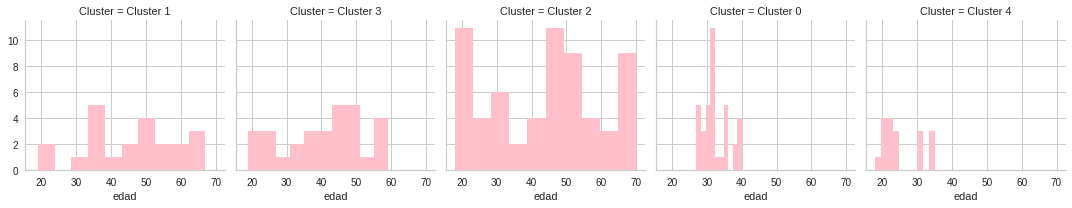

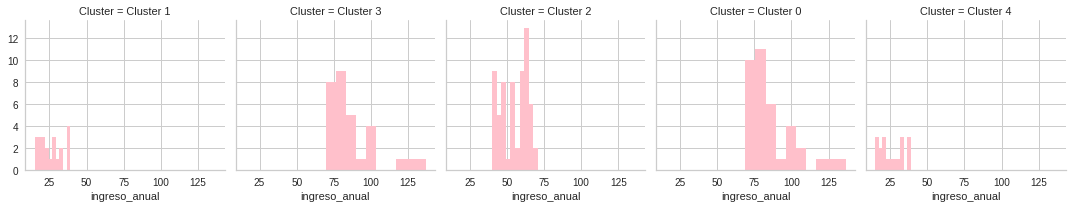

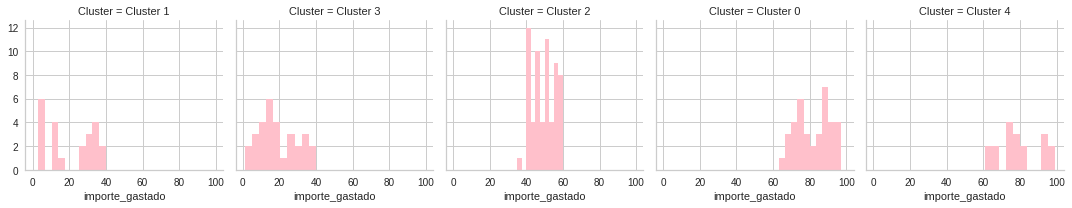

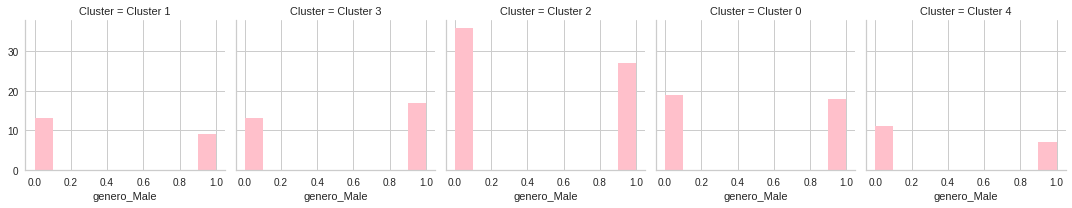

In [72]:
for i in clientes: #para analizar cada cluster
    a = sns.FacetGrid(km_resultados, col='Cluster')
    a.map(plt.hist, i, color='pink')

##Predicción sobre datos no vistos

In [57]:
kmeans_predictions = predict_model(model = km, data = clientes_no_vistos)


In [58]:
kmeans_predictions

,edad,ingreso_anual,importe_gastado,genero_Male,Cluster
0,30,19,72,0,Cluster 4
1,25,24,73,1,Cluster 4
2,29,28,82,1,Cluster 4
3,23,29,87,0,Cluster 4
4,42,34,17,0,Cluster 1
5,20,37,75,0,Cluster 4
6,27,40,47,0,Cluster 2
7,27,46,51,0,Cluster 2
8,68,48,48,0,Cluster 2
9,70,49,55,1,Cluster 2


##Guardando el modelo

In [ ]:
save_model(km,"saved_km")

##Accediendo al modelo

In [63]:
saved_km = load_model("saved_km")

Transformation Pipeline and Model Successfully Loaded


# **Conclusiones**

El cluster 2 es el que tiene más datos y el cluster 4 el que tiene menos. 
En la mayoría de los cluster predomina el género femenino, siendo más fuerte en el cluster 2.


**Cluster 2**
El rango etario presenta mucha variabilidad, entre los 18 y 70 años. Además, el ingreso anual oscila entre 30 y 60 mil, y sus compras varían entre 40 y 80 mil anuales. El consumo guarda relación con los ingresos.


**Cluster 4**
La mayor cantidad de datos presenta una edad entre 18 y 25 años, los ingresos son menores a 30mil, pero el importe gastado es superior a los 60 mil. Se estima que en su mayoría estas personas son estudiantes, cuyos gastos son financiados por los padres. Recomendación: tarjetas de créditos a estudiantes universitarios.


**Cluster 3**
Si bien los ingresos son superiores a 60mil, el importe gastado no supera los 40mil. Es el único cluster donde predomina el género masculino.  Recomendación: mayor oferta de productos de consumo masculino.


**Cluster 0**
Se trata de personas entre los 25 a 40 años y los ingresos son superiores a 75mil, sin embargo, la frecuencia de gasto del cluster es baja. Se observa casi el mismo porcentaje de participación de los clientes femeninos y masculinos. Recomendación: mayor oferta de productos de consumo masculino.


**Cluster 1**
El rango etario se distribuye entre los 20 a 65 años, los ingresos anuales son inferiores al importe gastado y es uno de los cluster de menor tamaño. Recomendación: evaluar la posibilidad del otorgamiento de créditos flexibles, es posible que sean personas con trabajos informales que no pueden acceder a una tarjeta de crédito común.
